# #Objective: Explore the applications of K-Means Clustering.
          1.Colour Quantization
          2.Image Segmentataion

**K-means** 

It is a clustering algorithm , a part of supervised machine learning. The algorithm partitions a set of points into K number of clusters such that the points in a particular cluster tend to be near each other. The points have no labels and hence K-means is an unsupervised algorithm.

Custering can be used for automatically organizing data, understanding hidden structure in data,  Preprocessing for further analysis etc.

#Algorithm:
1. Initialize clusters for a given dataset.
2. Initilaize labels for the samples in the dataset.
3. Compute the Euclidian distance of every data point from every center.
4. Update the labels by assigning the data point to that cluster from whose center it has the least Euclidian distance.
5. Update the cluster center by taking the mean of all the data points that belong to it.
6. Repeat until convergence ie. until the labels or the clusters do not change during updation.



#How to choose the value of K?

Consider the following data-set.
By looking at the distribution of the data what is the value of K intutively?
Would this value agree with the value of K chosen heuristically?
The heuristic for choosing the value of K is :
"Choose the K at which the elbow occurs since the value of the objective function does not decrease greatly."


DISTRIBUTION OF INPUT DATA


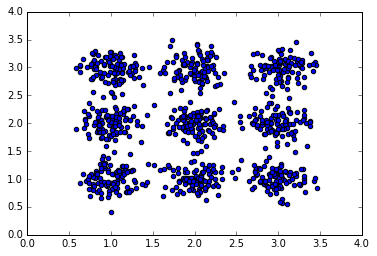

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
X=pd.read_csv('Tutorial_data.csv')
features=X.columns
l=len(X)
x=[]

for i in range(900):
    x.append(np.array([X['feature1'][i],X['feature2'][i]]))
z=[]
b=[]
for items in x:
    z.append(items[0])
    b.append(items[1])

plt.scatter(z,b)
print "DISTRIBUTION OF INPUT DATA"

So intutively we kow that the data consists of 9 clusters.
Lets check the value ok K obtained heuristically by running the following code for K-means clustering using random 
initialization.

1245.28280543
786.175842741
486.876667225
323.423233028
250.853479479
197.029264297
148.589283589
148.586377818
58.002810502
55.315044832
53.8637103186
50.260223284
49.9953873618
45.9420836918
44.8587964677
42.0736352831
41.9915822291
40.7430165827
39.6002606744
36.2686708357


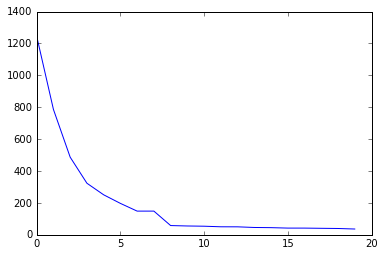

In [4]:
a=[0]*l
def update_assignments(X,C,a):
# INPUT:
#   X (num_samples x num_dims): data 
#   C (num_clusters x num_dims): cluster centers
#   a (num_samples x 1): cluster assignments (1, ..., num_clusters)
#                           for each data point
#OUTPUT:
#   a (num_samples x 1): updated assignments
    p=[0]*len(a)
    for i in range(len(x)):
        temp=[0]*len(C)
        for j in range(len(C)):
            temp[j]=sum((x[i]-C[j])**2)
        p[i] =temp.index(min(temp))
        
    return p
    
def update_centers(X, C, a):
# updates cluster centers, given data points and assignments
#INPUT:
#   X (num_samples x num_dims): data matrix
#   C (num_clusters x num_dims): cluster centers
#   a (num_samples x 1): cluster assignments (1, ..., num_clusters)
#                           for each data point
# OUTPUT:
#   C (num_clusters x num_dims): updated cluster centers
    temp=[0]*len(C)
    counter=[0]*len(C)

    for i in range(len(X)):
          temp[a[i]]=temp[a[i]]+X[i]
          counter[a[i]]=counter[a[i]]+1
 
    k=0
    for items in temp:
       temp[k]=items/counter[k]
       k=k+1
    return temp
    
def kmeans_obj(X, C, a):
# computes the k-means objective function
#INPUT:
#  X (num_samples x num_dims): data matrix
#   C (num_clusters x num_dims): cluster centers
#   a (num_samples x 1): cluster assignments (1, ..., num_clusters)
#                           for each data point
# OUTPUT:
#   obj (1 x 1): k-means objective function
#

    obj=0
    for i in range(len(X)):
        temp=[0]*len(C)
        for j in range(len(C)):
            temp[j]=sum((X[i]-C[j])**2)
        
        obj=obj+min(temp)
    return obj
    
def lloyd_iteration(X, C0):
#runs Lloyd's method until convergence
# INPUT:
#   X (num_samples x num_dims): data matrix
#   C0 (num_clusters x num_dims): initialized cluster centers
# OUTPUT:
#   C (num_clusters x num_dims): updated cluster centers
#   a (num_samples x 1): cluster assignment for each sample
    C=C0;
    a=[1]*len(X)
    #print a
    a_hat= update_assignments(X, C, a)
    check=a==a_hat
    while check==False:
        C_updated= update_centers(X,C,a_hat)
        a=a_hat
        a_hat= update_assignments(X, C_updated, a)
        check=a==a_hat
    print kmeans_obj(x,C_updated,a_hat)
    
    return (C_updated,a_hat)

c=x[0:9]
a=update_assignments(x,c,a)
#effect of increasing K on the Objctive value
objective=[]
for k in range(20):
    c=random.sample(x,k+1)
    a=update_assignments(x,c,a)
    (c1,a1)=lloyd_iteration(x, c)
    objective.append(kmeans_obj(x,c1,a1))
k=range(20)
plt.plot(k,objective)

As you can see from the above graph the objective value does not vary much after 9 inspite of increasing the number 
of clusters.
58.002810502
55.315044832
53.8637103186
50.260223284
49.9953873618
45.9420836918
44.8587964677
42.0736352831
41.9915822291
40.7430165827
39.6002606744
36.2686708357 are the values of the objective function values beyond K=9 and are almost constant.

Conclusion:
**Thus the heuristic value agrees with the intutive value.** 

**Problem with Random initialization:**
    The cluters may get initialized in such a way that 2 centres land in the same cluster and as a result split up
    a cluster into two leaving k-2 clusters to define the remaining of the k-1 clusters.
    Thus data is not seperated according to the right structure.
    This can be seen in the illustration below:

1245.28280543
791.695905786
485.649796026
323.387309783
241.830110513
196.678082847
151.075466893
149.492361308
100.921252195


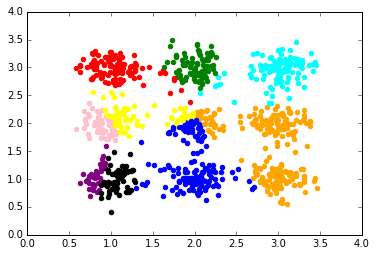

In [5]:
objective=[]
for k in range(9):
    c=random.sample(x,k+1)
    a=update_assignments(x,c,a)
    (c1,a1)=lloyd_iteration(x, c)
    objective.append(kmeans_obj(x,c1,a1))
k=range(9)
options=['red','blue','green','yellow','black','pink','cyan','purple','orange']
for i in range(len(x)):
      plt.scatter(z[i],b[i],color=options[a[i]])
      plt.hold(True)
plt.show()

#Solution:Use K-Means++ for initializing the centres.
          K-means++ randomly initializes only one center.
          It then calculates the distnance of all the data points from this centre. Further centres are decided based
          on these distances.
          It searches for the next center given the first one with probabilities proportional to the distance from
          the first center c1. K-Means++ sees to it that one cluster does not get split into two different ones.

The kmeans function of the scipy library uses the K-Means++ method for initializing the centres which gives much better results as seen below:


[[ 2.98142475  2.0082    ]
 [ 1.99518889  1.99759091]
 [ 1.00481386  1.00875347]
 [ 2.005804    1.005437  ]
 [ 1.004682    2.972059  ]
 [ 2.00313366  2.98522079]
 [ 2.98215657  1.0141    ]
 [ 3.042114    2.993532  ]
 [ 0.98915657  2.01070707]]


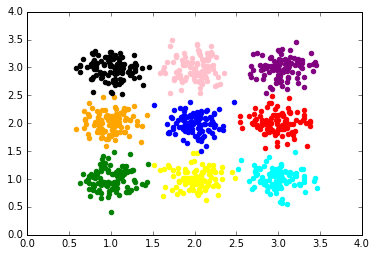

In [7]:
from scipy.cluster.vq import kmeans,vq
centroids,_ = kmeans(x,9)
print centroids
#kmeans takes the input data which is x and number of clusters=9
idx,_ = vq(x,centroids)
options=['red','blue','green','yellow','black','pink','cyan','purple','orange']
for i in range(len(x)):
      plt.scatter(z[i],b[i],color=options[idx[i]])
      plt.hold(True)
plt.show()


In [ ]:
As seen above:
     [ 2.98142475  2.0082    ]: Red Center
     [ 1.99518889  1.99759091]: Blue Center
     [ 1.00481386  1.00875347]: Green Center
     [ 2.005804    1.005437  ]: Yellow Center
     [ 1.004682    2.972059  ]: Black Center
     [ 2.00313366  2.98522079]: Pink Center
     [ 2.98215657  1.0141    ]: Cyan Center
     [ 3.042114    2.993532  ]: Purple Center
     [ 0.98915657  2.01070707]: Orange Center thus K-Means++ assigns the centres to the clusters correctly without
        splitting one cluster into two.


# Applications of K-Means Clustering

1.**Color Quantization**: 
Color quantization is the process of reducing the number of distinct colors in an image. 
The aim of colour quantization is to preserve the appearance of the image as much as possible, while reducing the number of colors. This saves memory space needed for storage or compression. Colour quantization is used in colour based content retrieval.

Features:
In this application the data contains pixels. Each pixel represents one data point. We convert the RGB representation of each pixel to Lab representation. 
Thus for each data point, L, a, and b are the 3 features. Because in the L, a, b color space the Euclidean distance between colors has actual perceptual meaning which is used in K- means clustering. 
The L*a*b* color space is derived from the CIE XYZ tristimulus values. The L*a*b* space consists of a luminosity layer 'L*', chromaticity-layer 'a*' indicating where color falls along the red-green axis, and chromaticity-layer 'b*' indicating where the color falls along the blue-yellow axis. All of the color information is in the 'a*' and 'b*' layers. You can measure the difference between two colors using the Euclidean distance metric.
Where L feature represents the lightness of the value of the pixel. 0 : Darkest black 100 : Brightest 
White Positive values of a represent Red and negative represent Green.
Similarly positive values of b represent Yellow and negative represent Blue. 
We first convert the image from the RGB color space to the L*a*b*color space.
Since we will be clustering using k-means which is based on the euclidean distance, we'll use theL*a*b* color space. 


In [ ]:
import cv2
import copy
# load the image and grab its width and height
image = cv2.imread("same2.jpg")
image = cv2.resize(image, (600,450))
(h, w) = image.shape[:2]

# convert the image from the RGB color space to the L*a*b*
# color space -- since we will be clustering using k-means
# which is based on the euclidean distance, we'll use the
# L*a*b* color space 
image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# reshape the image into a feature vector so that k-means
# can be applied
image = image.reshape((image.shape[0] * image.shape[1], 3))
#print image

# apply k-means using the specified number of clusters and
# then create the quantized image based on the predictions
clt = MiniBatchKMeans(n_clusters = 2)
labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

# reshape the feature vectors to images
quant = quant.reshape((h, w, 3))
image = image.reshape((h, w, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)

# savethe images and wait for a keypress
cv2.imwrite("same2_2.jpg",quant)
cv2.waitKey(0)


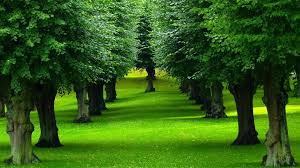

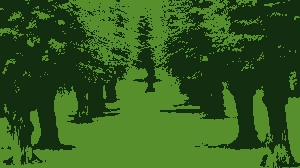

In [8]:
from IPython.display import Image
from IPython.display import display
x = Image(filename='same2.jpg') 
y = Image(filename='same2_2.jpg') 
display(x, y)

In [ ]:
Lets observe the effect of value of K on the image quality:
Here the origional image is followed by images with K=30 , 10 , 4. 

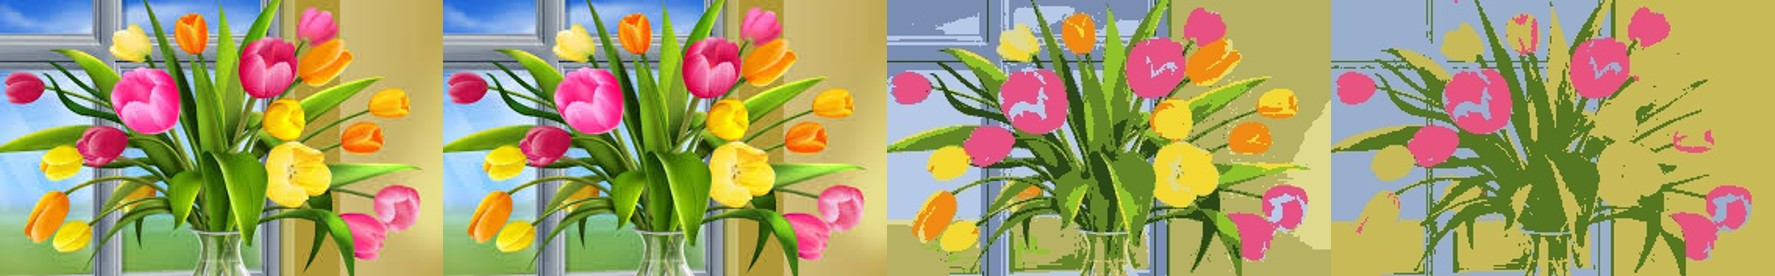

In [9]:
x = Image(filename='keffect.jpg')
display(x)

**Implication : **
    
Each pixel in the original image has varied values of L, a, b*. By using K- means we restrict the values that each 
feature of the pixels can have. 
Each pixel is now replaced by the pixel correponding to the cluster center to which it belongs.
Now each pixel in the image can have feature values from a small list of values that is the centroid values. For
example different shades of green colour would now be converted to a fewer shade of that colour.
This does lead to loss on individuality of the pixels and the minute differnces in he perception of colours are lost.


**Observation :**
    
There is a trade-off between the number of clusters and the quality of the image. Using less number of clusters leads to distortion. Increasing the number of clusters improves the quality of the image. Another tradeoff that is observed is that as the number of clusters increases the computation time also increases. However the memory footprint of the reconstructed image is still substantially smaller than that of the original image.
Lets observe the trade off for various kinds of images that have been color quantized using different values of k.


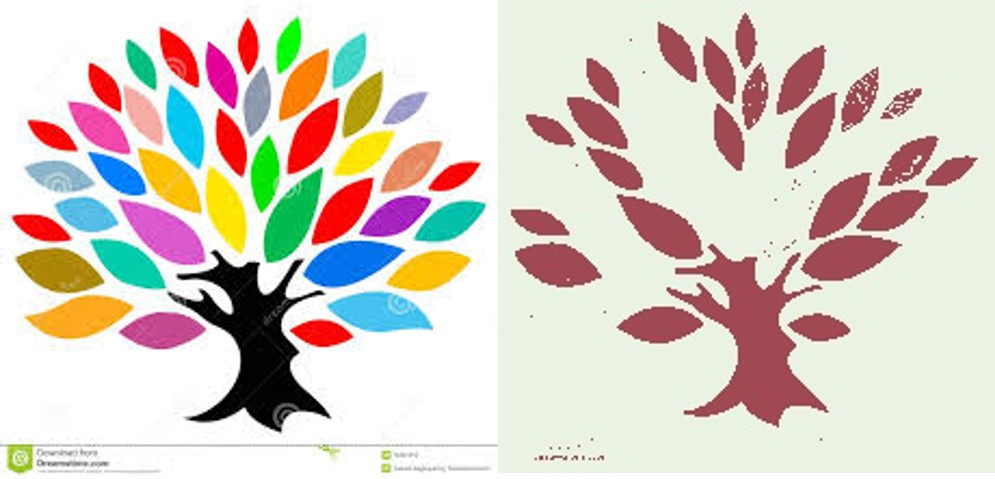

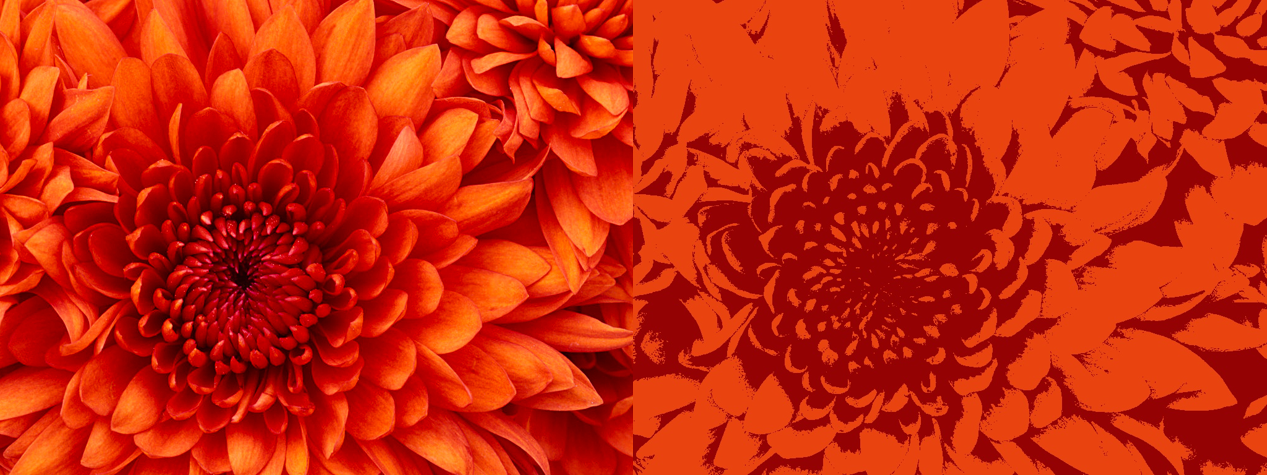

In [10]:
x = Image(filename='tree.jpg',width=500,height=300) 
y = Image(filename='flower.png',width=500,height=300) 
display(x, y)

Thus in case of the Crysanthemum there isn't much loss of information if K=2 since it predominantly has 
one colour -Orange.
However if we choose an image that inherently has varied colours then K=2 would lead to a loss of information.
From the above observations we can conclude that the value of K should be decided based on the original variation in 
the primary colours in the image.
Images having monotones can be compressed using a small value of K whereas for images having varied colours a
trade-off between the information quality and the memory foot-print needs to be dealt with.

Physically checking the memory foot-print: If you see the space needed for storing these images on your computer
you can easily verify the fact that the memory foot-print can be drastically reduced by colour quantization.

Original Crysanthemum : 858 KB (879,394 bytes)
K=2 Cysanthemum: 244 KB (249,955 bytes)


2.**Image Segmentation**:
If the object of interest has a strikingly different colour in comparison with the background then K-Means clustering can be used for image segmentation such that it can detect individual objects.

In [ ]:
image = cv2.imread("oa.jpg")
image = cv2.resize(image, (600,450))
(h, w) = image.shape[:2]

# convert the image from the RGB color space to the L*a*b*
# color space -- since we will be clustering using k-means
# which is based on the euclidean distance, we'll use the
# L*a*b* color space 
image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# reshape the image into a feature vector so that k-means
# can be applied
image = image.reshape((image.shape[0] * image.shape[1], 3))
#print image

# apply k-means using the specified number of clusters and
# then create the quantized image based on the predictions
clt = MiniBatchKMeans(n_clusters = 3)
#print clt
labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]
# reshape the feature vectors to images

for k in range(3):
    temp=copy.deepcopy(quant)
    for i in range(h*w):
            if np.all(quant[i]==clt.cluster_centers_.astype("uint8")[k])==False:
                temp[i]=[255 ,255 ,255]
            else :
                temp[i]=quant[i]

    temp = temp.reshape((h, w, 3))
    cv2.imshow('',temp)
    cv2.imwrite("oa"+ str(k) + ".jpg",temp)
quant = quant.reshape((h, w, 3))
image = image.reshape((h, w, 3))
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
# save the images and wait for a keypress
#cv2.imwrite("C:\Users\Administrator\Desktop\color-quantization-kmeans\H&E_3.jpg",quant)
cv2.waitKey(0)

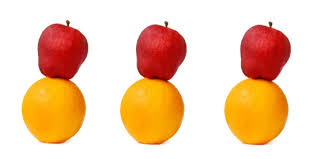

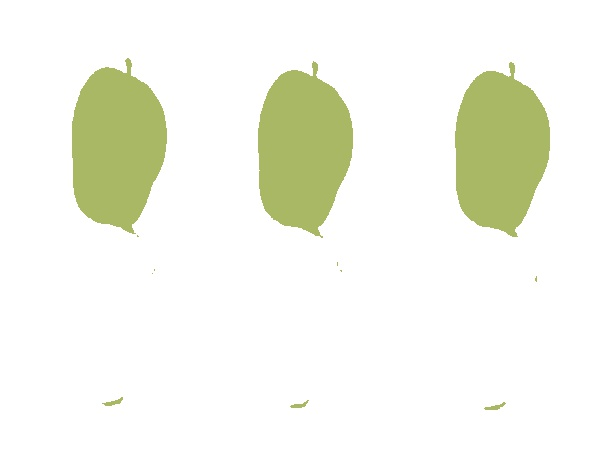

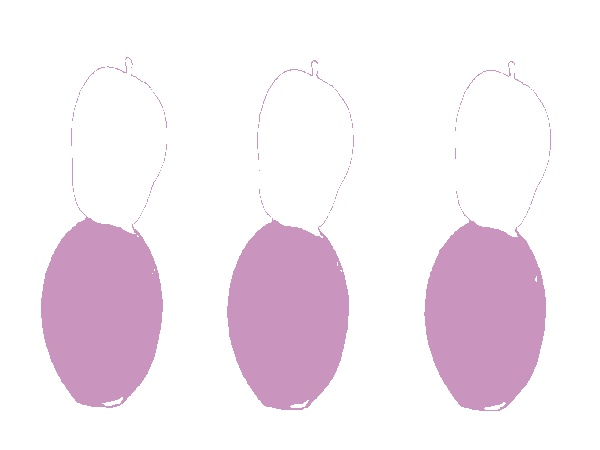

In [12]:
x=Image(filename='oa.jpg') 
y = Image(filename='oa1.jpg',width=300,height=300) 
y1 = Image(filename='oa2.jpg',width=300,height=300) 
display(x,y1,y)

Thus we can seperate oranges from apples using image segmentation.
The same concept can be used as 'Object Tracking' if there is only one object that needs to be identified from 
various images.
The same idea can be extended to videos since videos are nothing but a set of consecutive images.
For example to track a fish swimming in water we can use k-means clustering as shown above to detect the fish in 
consecutive frames.
We can thus track the moment of the fish throught the video. 